# Data Cleaning

#### Let's begin by loading the data that has temporal annotations per frame.
- All videos are 30 fps.

In [3]:
import pandas as pd

col_names = ['video_name', 'event', 'start1', 'end1', 'start2', 'end2']
data = pd.read_csv(
    '../data/Temporal_Anomaly_Annotation_for_Testing_Videos.txt',
    sep=r'\s+',
    header=None,
    names=col_names,
    engine='python'
)

In [4]:
data.head()

,video_name,event,start1,end1,start2,end2
0,Abuse028_x264.mp4,Abuse,165,240,-1,-1
1,Abuse030_x264.mp4,Abuse,1275,1360,-1,-1
2,Arrest001_x264.mp4,Arrest,1185,1485,-1,-1
3,Arrest007_x264.mp4,Arrest,1530,2160,-1,-1
4,Arrest024_x264.mp4,Arrest,1005,3105,-1,-1


#### Looks like most of them have one instance of anomaly. Let's check that.

In [5]:
print("Number of videos with second instance of event:", len(data[data['start2'] != -1]), "out of", len(data))

Number of videos with second instance of event: 16 out of 290


#### Given this, let's just keep videos that have one instance of anomaly. This means we're using 274 videos.

In [6]:
data = data[data['start2'] == -1]

#### We also want to have a dataset with anomalies exclusively, so we'll remove the rows with a Normal event.

In [8]:
anomalies = data[data['event'] != 'Normal']
anomalies

,video_name,event,start1,end1,start2,end2
0,Abuse028_x264.mp4,Abuse,165,240,-1,-1
1,Abuse030_x264.mp4,Abuse,1275,1360,-1,-1
2,Arrest001_x264.mp4,Arrest,1185,1485,-1,-1
3,Arrest007_x264.mp4,Arrest,1530,2160,-1,-1
4,Arrest024_x264.mp4,Arrest,1005,3105,-1,-1
...,...,...,...,...,...,...
281,Stealing036_x264.mp4,Stealing,1260,1590,-1,-1
282,Stealing058_x264.mp4,Stealing,570,3660,-1,-1
283,Stealing062_x264.mp4,Stealing,360,1050,-1,-1
285,Vandalism007_x264.mp4,Vandalism,240,750,-1,-1


#### We now have data for 124 videos

In [9]:
duration = anomalies['end1'] - anomalies['start1']
duration = duration/30 # Convert to seconds

In [10]:
print(duration.describe(percentiles=[0.1,0.15,0.2,0.25,0.5,0.75,0.90,0.99,0.999]))

count    124.000000
mean      18.764247
std       30.728390
min        1.000000
10%        2.500000
15%        3.000000
20%        3.333333
25%        4.000000
50%        7.500000
75%       16.166667
90%       53.033333
99%      112.470000
99.9%    216.176567
max      230.366667
dtype: float64


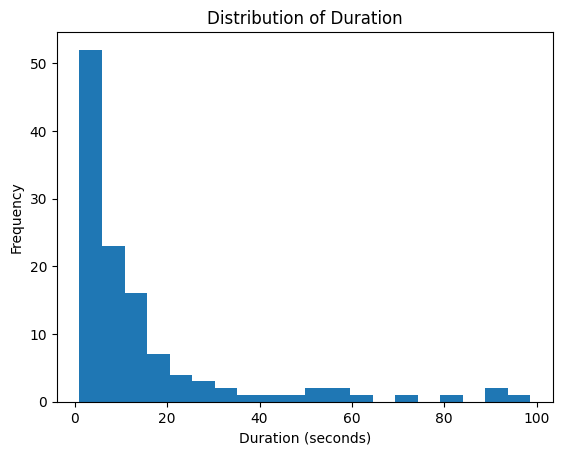

In [11]:
import matplotlib.pyplot as plt

plt.hist(duration[duration < 100], bins=20)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

#### We can tell that most events take at most 10 seconds, with a a mean of 7.5 seconds. Let's zoom in at those that last less than 10 second.

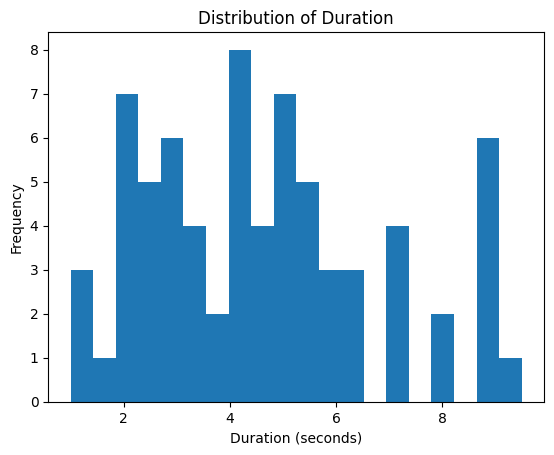

In [12]:
#Remove outliers from the duration list
plt.hist(duration[duration < 10], bins=20)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

#### Taking into account there are only 3 instances for which an anomaly took a second or less, we will sample using one frame per second.

In [13]:
anomalies = anomalies.drop(columns=['start2', 'end2'])

In [14]:
anomalies.to_json("../data/anomalies.json", orient="records")